In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir id_card_tampering
!mkdir id_card_tampering/image

mkdir: cannot create directory ‘id_card_tampering’: File exists
mkdir: cannot create directory ‘id_card_tampering/image’: File exists


In [3]:
# Open image and display
original = Image.open("/content/original.jpeg")
tampered = Image.open("/content/temper.png")

# Loading original and user provided images.

In [4]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (289, 174)
Tampered image size :  (1013, 641)


# Converting the format of tampered image similar to original image.

In [5]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('id_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('id_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


# Converting the size of tampered and original image.

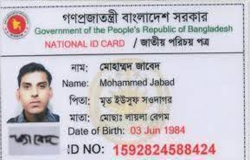

In [6]:
# Display original image
original

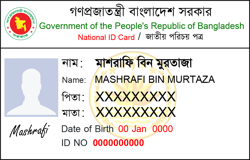

In [7]:
# Display user given image
tampered

# Reading images using opencv.

In [8]:
# Load the images
original = cv2.imread('id_card_tampering/image/original.png')
tampered = cv2.imread('id_card_tampering/image/tampered.png')

- Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.

In [9]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

* Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [10]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.1619600860138791


## Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.

## Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [11]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

* Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

In [12]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


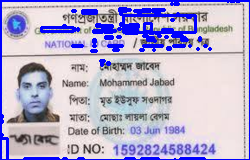

In [13]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


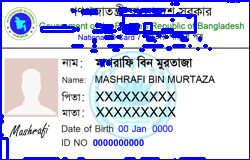

In [14]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


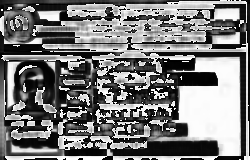

In [15]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


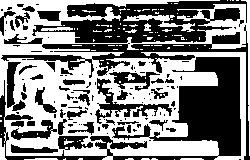

In [16]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

# Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
#### As, our SSIM is ~0.16% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  